In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

Section 1

In [114]:
#read csv files
try :
    players_df = pd.read_csv(r'C:\\Users\\Public\\players.csv')
    mvp_df = pd.read_csv(r'C:\\Users\\Public\\mvp.csv')
    top50_df = pd.read_csv(r'C:\\Users\\Public\top50.csv')
    champions_df = pd.read_csv(r'C:\\Users\\Public\\league_champions.csv')
    print('The desired files were read')
except FileNotFoundError :
    print('The desired files were not found')


The desired files were read


In [115]:
# Convert height from feet, inches format to centimeters
def height_to_cm(height):
    feet, inches = str(height).replace('"', '').split("'")
    height_cm = (int(feet) * 12 + int(inches)) * 2.54
    return height_cm

#Creating a new column ;  ['height_cm']
players_df['height_cm'] = players_df['height'].apply(height_to_cm)
#Delete rows that have no data
players_df.dropna( subset=['height_cm'], inplace=True )

In [116]:
# Filter MVP winners "(Rank = 1)" for seasons 2019 to 2024
mvp_winners = mvp_df[
    (mvp_df['Rank'] == 1) &
    (mvp_df['Season'].isin(['2019 - 2020', '2020 - 2021', '2021 - 2022', '2022 - 2023', '2023 - 2024']))]
[['Player_ID', 'Name', 'Season']]

[['Player_ID', 'Name', 'Season']]

In [117]:
# Filter Top50 players for seasons 2019 to 2024
top50_players = top50_df[
    top50_df['Season'].isin(['2019 - 2020', '2020 - 2021', '2021 - 2022', '2022 - 2023', '2023 - 2024'])]
[['Player_ID', 'Name', 'Season']]

[['Player_ID', 'Name', 'Season']]

In [118]:
# Remove duplicates by Player_ID to get unique players
mvp_winners_unique = mvp_winners.drop_duplicates(subset=['Player_ID'])
top50_players_unique = top50_players.drop_duplicates(subset=['Player_ID'])

# Merge with players_df to get height
mvp_heights = mvp_winners_unique.merge(players_df[['Player_ID', 'height']], on='Player_ID', how='left')
top50_heights = top50_players_unique.merge(players_df[['Player_ID', 'height']], on='Player_ID', how='left')

# Convert height to centimeters
mvp_heights['height_cm'] = mvp_heights['height'].apply(height_to_cm)
top50_heights['height_cm'] = top50_heights['height'].apply(height_to_cm)

# Remove rows with missing height
mvp_heights = mvp_heights.dropna(subset=['height_cm'])
top50_heights = top50_heights.dropna(subset=['height_cm'])


print("Descriptive Statistics for MVP Winners' Heights (in centimeters):")
print(mvp_heights['height_cm'].describe())
print("\nDescriptive Statistics for Top50 Players' Heights (in centimeters):")
print(top50_heights['height_cm'].describe())

Descriptive Statistics for MVP Winners' Heights (in centimeters):
count      3.000000
mean     211.666667
std        1.466470
min      210.820000
25%      210.820000
50%      210.820000
75%      212.090000
max      213.360000
Name: height_cm, dtype: float64

Descriptive Statistics for Top50 Players' Heights (in centimeters):
count    100.000000
mean     198.043800
std        8.584799
min      182.880000
25%      192.405000
50%      198.120000
75%      203.200000
max      220.980000
Name: height_cm, dtype: float64


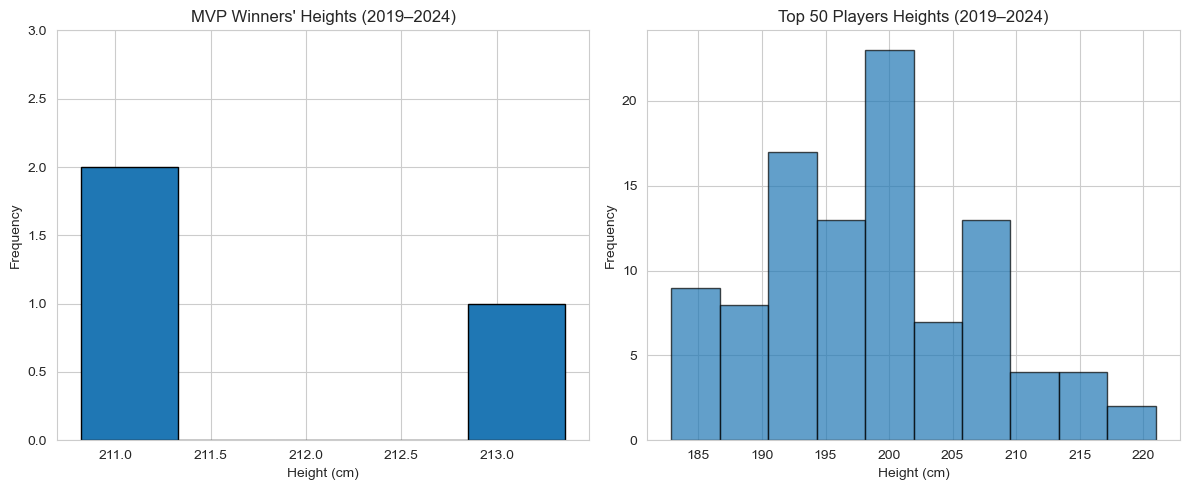

In [119]:
def histograms_plot_height(mvp_data, top50_data, bins_mvp = 5, bins_top50 = 10) :
    plt.figure(figsize=(12, 5))

    #MVP Winners
    plt.subplot(1, 2, 1)
    plt.hist(mvp_data, bins=bins_mvp, edgecolor='black', alpha=1)
    plt.xlabel("Height (cm)")
    plt.ylabel("Frequency")
    plt.ylim(0, 3)
    plt.title("MVP Winners' Heights (2019–2024)")

    #Top 50 Players
    plt.subplot(1, 2, 2)
    plt.hist(top50_data, bins=bins_top50, edgecolor='black', alpha=0.7)
    plt.xlabel("Height (cm)")
    plt.ylabel("Frequency")
    plt.title("Top 50 Players Heights (2019–2024)")

    plt.tight_layout()
    plt.show()


histograms_plot_height(mvp_heights['height_cm'],  top50_heights['height_cm'])

Section 2


In [120]:
'''season_target = champions_df['Season'].value_counts()
season_target'''


"season_target = champions_df['Season'].value_counts()\nseason_target"

In [121]:
'''# Filter data for last two seasons (2023-2024 and 2024-2025)
last_two_seasons = ['2023-2024', '2024-2025']
champions_last_two = champions_df[champions_df['Season'].isin(last_two_seasons)]
champions_last_two'''

"# Filter data for last two seasons (2023-2024 and 2024-2025)\nlast_two_seasons = ['2023-2024', '2024-2025']\nchampions_last_two = champions_df[champions_df['Season'].isin(last_two_seasons)]\nchampions_last_two"

In [122]:
'''# Merge with players to get height and experience
champions_data = pd.merge(champions_last_two, players_df, on='Player_ID', how='left')
champions_data'''

"# Merge with players to get height and experience\nchampions_data = pd.merge(champions_last_two, players_df, on='Player_ID', how='left')\nchampions_data"

In [123]:
'''def height_to_cm(height):
    feet, inches = str(height).replace('"', '').split("'")
    height_cm = (int(feet) * 12 + int(inches)) * 2.54
    return height_cm

champions_data['height_cm'] = champions_data['height'].apply(height_to_cm)
champions_data['height_cm']'''

'def height_to_cm(height):\n    feet, inches = str(height).replace(\'"\', \'\').split("\'")\n    height_cm = (int(feet) * 12 + int(inches)) * 2.54\n    return height_cm\n\nchampions_data[\'height_cm\'] = champions_data[\'height\'].apply(height_to_cm)\nchampions_data[\'height_cm\']'

In [124]:
'''# Filter top 15 players for last two seasons
top15_last_two = top50_df[top50_df['Season'].isin(last_two_seasons)].head(15)
top15_data = pd.merge(top15_last_two, players_df, on='Player_ID', how='left')
top15_data['height_cm'] = top15_data['height'].apply(height_to_cm)'''

"# Filter top 15 players for last two seasons\ntop15_last_two = top50_df[top50_df['Season'].isin(last_two_seasons)].head(15)\ntop15_data = pd.merge(top15_last_two, players_df, on='Player_ID', how='left')\ntop15_data['height_cm'] = top15_data['height'].apply(height_to_cm)"

In [125]:
'''print("Columns in champions_data:", champions_data.columns.tolist())
print("Columns in top15_data:", top15_data.columns.tolist())'''


'print("Columns in champions_data:", champions_data.columns.tolist())\nprint("Columns in top15_data:", top15_data.columns.tolist())'

In [126]:
''''# Cleaning data
champions_data = champions_data.dropna(subset=['Experience_x', 'height_cm'])
top15_data = top15_data.dropna(subset=['Experience', 'height_cm'])'''

"'# Cleaning data\nchampions_data = champions_data.dropna(subset=['Experience_x', 'height_cm'])\ntop15_data = top15_data.dropna(subset=['Experience', 'height_cm'])"

In [127]:
'''plt.figure(figsize=(12, 6))

#Experience with KDE
plt.subplot(1, 2, 1)
sns.kdeplot(data=champions_data['Experience_x'], label='Champions', fill=True)
sns.kdeplot(data=top15_data['Experience'], label='Top 15', fill=True)
plt.title('Experience Distribution')
plt.xlabel('Years of Experience')
plt.ylabel('Density')
plt.legend()

#Height with KDE
plt.subplot(1, 2, 2)
sns.kdeplot(data=champions_data['height_cm'], label='Champions', fill=True)
sns.kdeplot(data=top15_data['height_cm'], label='Top 15', fill=True)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()'''

"plt.figure(figsize=(12, 6))\n\n#Experience with KDE\nplt.subplot(1, 2, 1)\nsns.kdeplot(data=champions_data['Experience_x'], label='Champions', fill=True)\nsns.kdeplot(data=top15_data['Experience'], label='Top 15', fill=True)\nplt.title('Experience Distribution')\nplt.xlabel('Years of Experience')\nplt.ylabel('Density')\nplt.legend()\n\n#Height with KDE\nplt.subplot(1, 2, 2)\nsns.kdeplot(data=champions_data['height_cm'], label='Champions', fill=True)\nsns.kdeplot(data=top15_data['height_cm'], label='Top 15', fill=True)\nplt.title('Height Distribution')\nplt.xlabel('Height (cm)')\nplt.ylabel('Density')\nplt.legend()\n\nplt.tight_layout()\nplt.show()"

Section 2

In [128]:
def height_to_cm(height):
    feet, inches = str(height).replace('"', '').split("'")
    height_cm = (int(feet) * 12 + int(inches)) * 2.54
    return height_cm

In [129]:
last_two_seasons = ['2022-2023', '2023-2024']

In [130]:
champions_last_two = champions_df[champions_df['Season'].isin(last_two_seasons)]
champions_data = pd.merge(champions_last_two, players_df, on='Player_ID', how='left')
champions_data['height_cm'] = champions_data['height'].apply(height_to_cm)
champions_data = champions_data.dropna(subset=['Experience_x', 'height_cm'])
champions_data

,ID,Player_ID,Team_ID,Shirt_No,Name,Experience_x,Season,Team_abv,Player_Name,Position,Shoots,Experience_y,height,weight,Birth_date,Hometown,Country_State,height_cm
0,60,2,26,10,Jack White,0,2022-2023,DEN,Jack White,Small Forward,Right,2,"6'7""",225,"August 5,\r\n 1997",Traralgon,Australia,200.66
1,61,3,26,3,Bones Hyland,1,2022-2023,DEN,Bones Hyland,Point Guard and Shooting Guard,Right,4,"6'2""",173,"September 14,\r\n 2000",Wilmington,Delaware,187.96
2,62,23,26,32,Jeff Green,14,2022-2023,DEN,Jeff Green,"Power Forward, Small Forward, and Center",Right,17,"6'8""",235,"August 28,\r\n 1986",Cheverly,Maryland,203.20
3,63,32,26,31,Vlatko ÄanÄar,3,2022-2023,DEN,Vlatko ÄanÄar,Power Forward,Right,5,"6'8""",236,"April 10,\r\n 1997",Koper,Slovenia,203.20
4,64,53,26,0,Christian Braun,0,2022-2023,DEN,Christian Braun,Shooting Guard,Right,3,"6'6""",218,"April 17,\r\n 2001",Burlington,Kansas,198.12
5,65,57,26,50,Aaron Gordon,8,2022-2023,DEN,Aaron Gordon,Power Forward and Small Forward,Right,11,"6'8""",235,"September 16,\r\n 1995",San,California,203.20
6,66,78,26,22,Zeke Nnaji,2,2022-2023,DEN,Zeke Nnaji,Power Forward,Right,5,"6'9""",240,"January 9,\r\n 2001",Hopkins,Minnesota,205.74
7,67,94,26,5,Kentavious Caldwell-Pope,9,2022-2023,DEN,Kentavious Caldwell-Pope,Shooting Guard,Right,12,"6'5""",204,"February 18,\r\n 1993",Thomaston,Georgia,195.58
8,68,102,26,27,Jamal Murray,5,2022-2023,DEN,Jamal Murray,Point Guard and Shooting Guard,Right,8,"6'4""",215,"February 23,\r\n 1997",Kitchener,Ontario,193.04
9,69,103,26,14,Ish Smith,12,2022-2023,DEN,Ish Smith,Point Guard,Right,14,"6'0""",175,"July 5,\r\n 1988",Charlotte,North Carolina,182.88


In [131]:
top15_last_two = top50_df[top50_df['Season'].isin(last_two_seasons)].groupby('Season').head(15)
top15_data = pd.merge(top15_last_two, players_df, on='Player_ID', how='left')
top15_data['height_cm'] = top15_data['height'].apply(height_to_cm)
top15_data = top15_data.dropna(subset=['Experience', 'height_cm'])
top15_data

,ID,Player_ID,Team_ID,Rank,Name,Team_abv,Season,Player_Name,Position,Shoots,Experience,height,weight,Birth_date,Hometown,Country_State,height_cm
